# Apple Music Data Science Analysis (modified from original 2020 version)

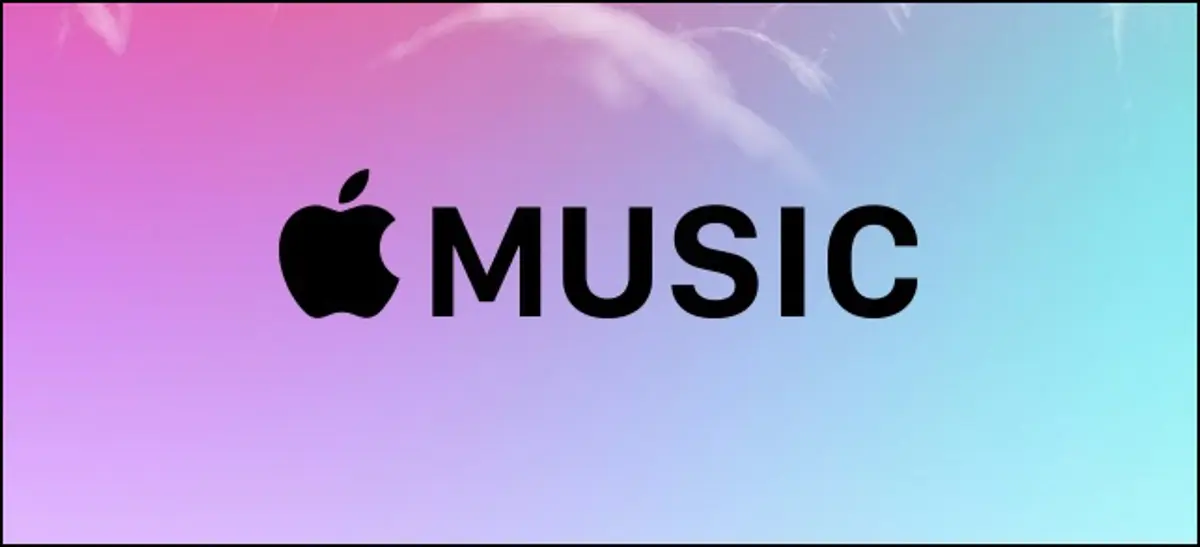

## Introduction:

*Context*: We will use Benjamin Bellman’s Itunes Library to conduct this analysis. All the music
that Ben listens too comes from Itunes (not Apple Music) and he currently still uses it. His whole
music library can be found here. These are all the songs that he has kept adding onto in his library
since 2008 (when he was 13). There are a couple of important of disclosures which will be further
addressed during the analysis:
- The Data comes from Itunes.
- It was exported from Itunes to Excel in csv format.
- A column for country of origin and genre were manually created in Excel.
- Therefore, the Genre and Country columns may have some strange values.
- In addition, the Genre’s are subjective. Many songs could be either Electronic or Dance.
- Some of the data is incomplete. Not all albums are available, for example.
- Ben got a new macbook back in 2013. This means three things:

<br> 1) When information was transfered from his old Mac to the New one, the play count of songs before 2013 was erased.

<br> 2) Another consequence is that a large majority of songs prior to 2013 were added on 9/4/2013.This is why this day will record the most added songs and why overall, many songs were
added in 2013.

<br> 3) Some songs were sadly lost, erased or deleted (~100).

# I. Data Cleaning

In [1]:
## We import packages that will be needed.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from datetime import datetime as dt
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
%matplotlib inline
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
## Let's load our data and preview it.
music = pd.read_csv('.\Apple_Music_Raw_Data.csv', header = None)
music.head()

,0,1,2,3,4,5,6,7
0,Blankets,2:54,Fantompower,4 AM Coding Session,35,"12/2/21, 8:01 AM","12/5/21, 7:20 PM",Lowfi
1,Liquid Larry,1:22,I'm Surf,4 AM Coding Session,35,"12/2/21, 8:00 AM","12/5/21, 7:17 PM",Lowfi
2,Epilogue (Original Mix),0:50,Mell-o,4 AM Coding Session,36,"12/2/21, 8:00 AM","12/5/21, 7:16 PM",Lowfi
3,Beautiful escape,3:41,Hoogway,4 AM Coding Session,36,"12/2/21, 8:00 AM","12/5/21, 7:15 PM",Lowfi
4,Waiting For Your Call,3:05,Jordy Chandra,4 AM Coding Session,36,"12/2/21, 8:00 AM","12/5/21, 7:12 PM",Lowfi


In [3]:
## We have no columns, let's rename them.
columns = ['song_title','duration','music_artist','album','plays','date_added','last_played','genre']
music.columns = columns
music.head()

,song_title,duration,music_artist,album,plays,date_added,last_played,genre
0,Blankets,2:54,Fantompower,4 AM Coding Session,35,"12/2/21, 8:01 AM","12/5/21, 7:20 PM",Lowfi
1,Liquid Larry,1:22,I'm Surf,4 AM Coding Session,35,"12/2/21, 8:00 AM","12/5/21, 7:17 PM",Lowfi
2,Epilogue (Original Mix),0:50,Mell-o,4 AM Coding Session,36,"12/2/21, 8:00 AM","12/5/21, 7:16 PM",Lowfi
3,Beautiful escape,3:41,Hoogway,4 AM Coding Session,36,"12/2/21, 8:00 AM","12/5/21, 7:15 PM",Lowfi
4,Waiting For Your Call,3:05,Jordy Chandra,4 AM Coding Session,36,"12/2/21, 8:00 AM","12/5/21, 7:12 PM",Lowfi


In [4]:
## Let's look at the info. 
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3006 entries, 0 to 3005
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   song_title    3006 non-null   object
 1   duration      3006 non-null   object
 2   music_artist  3006 non-null   object
 3   album         1625 non-null   object
 4   plays         2991 non-null   object
 5   date_added    3006 non-null   object
 6   last_played   2991 non-null   object
 7   genre         3006 non-null   object
dtypes: object(8)
memory usage: 188.0+ KB


This is how Apple_Music spits out music. However, being passionate about my music, I manually added the countries for all artists in the dataset. Let's see what this looks like.

In [5]:
## We load and preview the new data. 
music = pd.read_csv('.\Music_Data_Countries.csv')
music.head()

,Song ID,Song Title,Lenght,Country,Artist,Album,Plays,Date Added,Last Played,Genre,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,The Set-Up,4:14,USA,Moodyman,NaN,30.0,"11/22/21, 7:56 AM","11/23/21, 10:29 AM",Electronic,NaN,NaN,NaN,NaN
1,2,Italo Disco,6:56,FR,Lifelike,NaN,53.0,"11/22/21, 7:54 AM","11/23/21, 7:59 PM",Dance,NaN,NaN,NaN,NaN
2,3,Horizon (Japan bonus track),4:25,FR,Daft Punk,Random Access Memories,67.0,"11/21/21, 11:16 AM","11/23/21, 3:20 PM",Alternative,NaN,NaN,NaN,NaN
3,4,Aerodynamic (Daft Punk Remix),6:11,FR,Daft Punk,NaN,44.0,"11/21/21, 11:14 AM","11/23/21, 7:30 PM",Dance,NaN,NaN,NaN,NaN
4,5,Metamodernity,2:43,USA,Vansire,NaN,64.0,"11/18/21, 5:09 PM","11/23/21, 6:10 PM",Alternative,NaN,NaN,NaN,NaN


In [6]:
##We data a look at the columns 
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2979 entries, 0 to 2978
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Song ID       2979 non-null   int64  
 1   Song Title    2979 non-null   object 
 2   Lenght        2979 non-null   object 
 3   Country       2979 non-null   object 
 4   Artist        2979 non-null   object 
 5   Album         1608 non-null   object 
 6   Plays         2964 non-null   float64
 7   Date Added    2979 non-null   object 
 8   Last  Played  2964 non-null   object 
 9   Genre         2979 non-null   object 
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
dtypes: float64(5), int64(1), object(8)
memory usage: 326.0+ KB


In [7]:
## We drop columns which we do not need and contain no values. 
music = music.drop(columns=['Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13'])
music.head()

,Song ID,Song Title,Lenght,Country,Artist,Album,Plays,Date Added,Last Played,Genre
0,1,The Set-Up,4:14,USA,Moodyman,NaN,30.0,"11/22/21, 7:56 AM","11/23/21, 10:29 AM",Electronic
1,2,Italo Disco,6:56,FR,Lifelike,NaN,53.0,"11/22/21, 7:54 AM","11/23/21, 7:59 PM",Dance
2,3,Horizon (Japan bonus track),4:25,FR,Daft Punk,Random Access Memories,67.0,"11/21/21, 11:16 AM","11/23/21, 3:20 PM",Alternative
3,4,Aerodynamic (Daft Punk Remix),6:11,FR,Daft Punk,NaN,44.0,"11/21/21, 11:14 AM","11/23/21, 7:30 PM",Dance
4,5,Metamodernity,2:43,USA,Vansire,NaN,64.0,"11/18/21, 5:09 PM","11/23/21, 6:10 PM",Alternative


In [8]:
## And rename the ones we do. 
columns = ['song_id','title','time','country','artist','album','plays','date_added','last_played','genre']
music.columns = columns
music.head()

,song_id,title,time,country,artist,album,plays,date_added,last_played,genre
0,1,The Set-Up,4:14,USA,Moodyman,NaN,30.0,"11/22/21, 7:56 AM","11/23/21, 10:29 AM",Electronic
1,2,Italo Disco,6:56,FR,Lifelike,NaN,53.0,"11/22/21, 7:54 AM","11/23/21, 7:59 PM",Dance
2,3,Horizon (Japan bonus track),4:25,FR,Daft Punk,Random Access Memories,67.0,"11/21/21, 11:16 AM","11/23/21, 3:20 PM",Alternative
3,4,Aerodynamic (Daft Punk Remix),6:11,FR,Daft Punk,NaN,44.0,"11/21/21, 11:14 AM","11/23/21, 7:30 PM",Dance
4,5,Metamodernity,2:43,USA,Vansire,NaN,64.0,"11/18/21, 5:09 PM","11/23/21, 6:10 PM",Alternative


In [9]:
## Let's take a look again/
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2979 entries, 0 to 2978
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   song_id      2979 non-null   int64  
 1   title        2979 non-null   object 
 2   time         2979 non-null   object 
 3   country      2979 non-null   object 
 4   artist       2979 non-null   object 
 5   album        1608 non-null   object 
 6   plays        2964 non-null   float64
 7   date_added   2979 non-null   object 
 8   last_played  2964 non-null   object 
 9   genre        2979 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 232.9+ KB


In [10]:
## We need to convert our date_added and time columnns to datetime. 
music.date_added = pd.to_datetime(music.date_added)
music.time = pd.to_datetime(music.time,format= '%M:%S').apply(lambda x : x - (pd.to_datetime('1900-01-01 00:00:00')))
music['year_added'] = pd.DatetimeIndex(music['date_added']).year.astype(int)
music['month_added'] = pd.DatetimeIndex(music['date_added']).month.astype(int)
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2979 entries, 0 to 2978
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   song_id      2979 non-null   int64          
 1   title        2979 non-null   object         
 2   time         2979 non-null   timedelta64[ns]
 3   country      2979 non-null   object         
 4   artist       2979 non-null   object         
 5   album        1608 non-null   object         
 6   plays        2964 non-null   float64        
 7   date_added   2979 non-null   datetime64[ns] 
 8   last_played  2964 non-null   object         
 9   genre        2979 non-null   object         
 10  year_added   2979 non-null   int64          
 11  month_added  2979 non-null   int64          
dtypes: datetime64[ns](1), float64(1), int64(3), object(6), timedelta64[ns](1)
memory usage: 279.4+ KB


In [11]:
## We also create a column to get our song duration in seconds.
music['time_seconds'] = (music['time'].dt.total_seconds())

In [12]:
## Let's preview one more time
music.head()

,song_id,title,time,country,artist,album,plays,date_added,last_played,genre,year_added,month_added,time_seconds
0,1,The Set-Up,0 days 00:04:14,USA,Moodyman,NaN,30.0,2021-11-22 07:56:00,"11/23/21, 10:29 AM",Electronic,2021,11,254.0
1,2,Italo Disco,0 days 00:06:56,FR,Lifelike,NaN,53.0,2021-11-22 07:54:00,"11/23/21, 7:59 PM",Dance,2021,11,416.0
2,3,Horizon (Japan bonus track),0 days 00:04:25,FR,Daft Punk,Random Access Memories,67.0,2021-11-21 11:16:00,"11/23/21, 3:20 PM",Alternative,2021,11,265.0
3,4,Aerodynamic (Daft Punk Remix),0 days 00:06:11,FR,Daft Punk,NaN,44.0,2021-11-21 11:14:00,"11/23/21, 7:30 PM",Dance,2021,11,371.0
4,5,Metamodernity,0 days 00:02:43,USA,Vansire,NaN,64.0,2021-11-18 17:09:00,"11/23/21, 6:10 PM",Alternative,2021,11,163.0


## Let's explore our data and get more information 

In [13]:
## Let's take a look at how many unique genres and artists we have. 
print('Total Different Genres: ' + str(music.genre.nunique()))
print('Total Unique Artists: ' + str(music.artist.nunique()))
print('Total Unique Countries: ' + str(music.country.nunique()))
print('Total Different Albums: ' + str(music.album.nunique()))
print('Total Songs: '+ str(music.song_id.count()))

Total Different Genres: 116
Total Unique Artists: 1563
Total Unique Countries: 44
Total Different Albums: 1088
Total Songs: 2979


In [14]:
## Let's get some summary stats for song length and time: 
music[['time','plays']].describe()

,time,plays
count,2979,2964.000000
mean,0 days 00:03:59.738167170,44.740553
std,0 days 00:01:14.364438869,49.577872
min,0 days 00:00:30,1.000000
25%,0 days 00:03:18,14.000000
50%,0 days 00:03:47,29.000000
75%,0 days 00:04:29,59.000000
max,0 days 00:16:39,1001.000000


In [15]:
## Ok, not all of our songs have a play count. So we need to put 0 for all of them. 
music.plays.fillna(0, inplace =True)
print("The number of songs that haven't been played: " + str(music[music['plays']== 0]['title'].count()))

The number of songs that haven't been played: 15


In [16]:
## Let's look one more time. 
music[['time','plays']].describe()

,time,plays
count,2979,2979.000000
mean,0 days 00:03:59.738167170,44.515274
std,0 days 00:01:14.364438869,49.554178
min,0 days 00:00:30,0.000000
25%,0 days 00:03:18,14.000000
50%,0 days 00:03:47,28.000000
75%,0 days 00:04:29,58.000000
max,0 days 00:16:39,1001.000000


# II. Data Wrangling: 


In [17]:
## We create our by country_dataframe. 
by_country = music.groupby('country').agg(artist = ('artist','nunique'),
                                          plays = ('plays','sum'),
                                          songs = ('title','nunique'),
                                          average_play = ('plays', np.mean)
                                          ).sort_values('plays', ascending = False).reset_index()                                    
by_country.head()

,country,artist,plays,songs,average_play
0,FR,387,44497.0,856,51.441618
1,USA,605,42009.0,1085,37.982821
2,UK,211,21372.0,438,47.919283
3,CA,59,4654.0,103,45.184466
4,DE,57,3862.0,88,43.393258


In [18]:
## We had a lot of genre's, so we condensed them in a couple of categories before create the genre dataframe. 
music.replace(
    {'French Pop': "Foreign", "Alternative et rock latino":"Foreign", "Alternativo & Rock Latino": "Foreign", 
     "Arabic": "Foreign", "Brazilian": "Foreign", "Chanson": "Foreign", "Kpop": "Foreign", "Latin":"Foreign", 
     "Latino": "Foreign", "Musique francophone": "Foreign", "Musique pour enfants": "Foreign", 
     "Musiques du monde": "Foreign", "Variété française": "Foreign", "Variete Francaise": "Foreign", 
     "World": "Foreign", "Vari_t_ fran_aise": "Foreign",'K-Pop':"Foreign"}, inplace=True)

music.replace(
    {'Club': "EDM", "Dance": "EDM", "Dance;Trance;Tech": "EDM","Deep House": "EDM", "Disco": "EDM", 
     "Dubstep": "EDM", "EDM": "EDM", "Electronic": "EDM", "Electronic;House;Dance;Techno": "EDM", 
     "Electronic;Jazz;Dance": "EDM", "Electronica": "EDM", "Electronica/Dance": "EDM","Electronique": "EDM", 
     "Electroswing": "EDM", "Fitness & Workout": "EDM","Future House": "EDM", "G-House": "EDM", "House": "EDM", 
     "House;Electronic;Dance;Club": "EDM", "Indie Dance": "EDM", "Kygo": "EDM", "Melodic Deep House": "EDM", 
     "Nu Disco / Funk": "EDM", "Trance": "EDM", "Vaporwave":"EDM", "#dance":"EDM"}, inplace=True)

music.replace(
    {'Rock': "Rock", "Classic Rock": "Rock", "Classic Rock;Rock;Pop": "Rock", "Hard Rock": "Rock", "Metal": "Rock", 
     "Nu-Metal": "Rock", "PopRock": "Rock", "Pop;Oldies;Classic Rock": "Rock", "Psychedlic Rock": "Rock", "Punk": "Rock", 
     "Punk Rock": "Rock", "Rock": "Rock", "Rock/Pop": "Rock","Rock;Alternative": "Rock", "Soft Rock": "Rock", 
     "AlternRock": "Rock","Pop Rock":"Rock","Rock;Electronic":"Rock"},inplace=True)

music.replace(
    {'Alternative Rap': "Hip-Hop", "Hip Hop/Rap": "Hip-Hop","Hip-Hop": "Hip-Hop", "Hip-Hop/Rap": "Hip-Hop", 
    "Hip-Hop;Rap": "Hip-Hop","Hip-hop/Rap": "Hip-Hop", "RAP FR / OTHERS": "Hip-Hop", "Rap": "Hip-Hop","Rap & Hip-Hop": 
    "Hip-Hop", "Reggaeton y Hip-Hop": "Hip-Hop","Rap/R&B":"Hip-Hop"}, inplace=True)

music.replace(
    {'Alternative': "Alternative", "Alternative & Punk":"Alternative", "Alternative Punk": "Alternative", 
    "Grunge": "Alternative","Tropical_Garage": "Alternative","Indie":"Alternative"}, inplace=True)

music.replace(
    {'Britpop': "Pop", "Europop": "Pop", "Pop": "Pop", "Pop Latino": "Pop", "R & B": "Pop", "R&B": "Pop", 
     "R&B/Soul": "Pop", "Pop":"Pop"}, inplace=True)

music.replace(
    {'Comedy': "Comedy", "Karaoke": "Comedy", "Humor": "Comedy"}, inplace=True)

music.replace({'Bandes originales': "Soundtrack", "Soundtrack":"Soundtrack"}, inplace=True)

music.replace({'mashup': "Mashup"}, inplace=True)

music.replace(
    {'Ambient': "Other", "Funk":"Other","Bass": "Other", "Blues": "Other","Classical": "Other", 
    "Classical Music - Chamber Music ": "Other","Country": "Other", "Easy Listening": "Other", 
    "Folk": "Other", "General Jazz": "Other", "Gospel": "Other", "Holiday": "Other", "Instrumental":"Other", 
    "Jazz": "Other", "Jazz;Swing;Easy Listening": "Other", "Laser Funk":"Other", "Musique religieuse": "Other", 
    "New Age": "Other", "Oldies":"Other", "Other": "Other", "Reggae": "Other", "Singer/Songwriter": "Other",
    "Soul and R&B": "Other", "Summertime All The Time": "Other", "Summertime, All The Time": "Other", 
    "Vocal": "Other", "genre": "Other", "user defined":"Other", "Classical Music - Chamber Music": "Other",
    "Tropical":"Other"}, inplace=True)

by_genre = music.groupby('genre').agg(artist = ('artist','nunique'),
                                          plays = ('plays','sum'),
                                          songs = ('title','nunique'),
                                          average_play = ('plays', np.mean),
                                          median_play =('plays', np.median)
                                          ).sort_values('plays', ascending = False).reset_index()
                                   
by_genre.head(50)

,genre,artist,plays,songs,average_play,median_play
0,EDM,502,40556.0,794,50.380124,34.0
1,Pop,368,27140.0,586,45.844595,29.0
2,Foreign,168,19712.0,340,57.637427,39.0
3,Rock,201,14599.0,338,42.562682,22.0
4,Hip-Hop,186,10356.0,303,33.514563,21.0
5,Alternative,124,8076.0,207,38.457143,28.0
6,Other,99,5570.0,138,40.362319,25.5
7,Comedy,30,3050.0,122,24.796748,14.0
8,Soundtrack,48,2038.0,64,31.843750,18.0
9,Mashup,19,1514.0,53,28.566038,21.0


In [19]:
## Now by year
by_year = music.groupby('year_added').agg(artist = ('artist','nunique'),
                                          plays = ('plays','sum'),
                                          songs = ('title','nunique'),
                                          average_play = ('plays', np.mean)
                                          ).sort_values('plays', ascending = False).reset_index()
                                   
by_year.head(3)

,year_added,artist,plays,songs,average_play
0,2021,221,20673.0,260,79.206897
1,2013,511,17469.0,863,20.033257
2,2017,98,14177.0,165,85.921212


In [20]:
# Now by Month
by_month = music.groupby('month_added').agg(artist = ('artist','nunique'),
                                          plays = ('plays','sum'),
                                          songs = ('title','nunique'),
                                          average_play = ('plays', np.mean)
                                          ).sort_values('plays', ascending = False).reset_index()
by_month.head(3)

,month_added,artist,plays,songs,average_play
0,9,623,29616.0,1023,28.614493
1,7,128,11315.0,163,69.417178
2,3,176,11031.0,207,53.289855


# III. Exploratory Data Analysis (EDA)

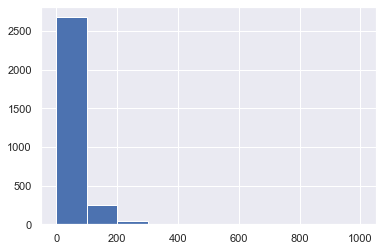

In [21]:
## Let's explore the distribution of the music
_ = music.plays.hist(bins=10)

In [22]:
## Ok, let's look at the top songs:
music.plays.sort_values(ascending=False).head(10)

603     1001.0
805      529.0
602      371.0
862      316.0
298      306.0
620      301.0
561      298.0
2583     293.0
768      290.0
350      261.0
Name: plays, dtype: float64

Ok, the top song is an outlier. The three most played songs seem to be very high, so we will not remove them, but change the x axis to better visualize the distribution. 

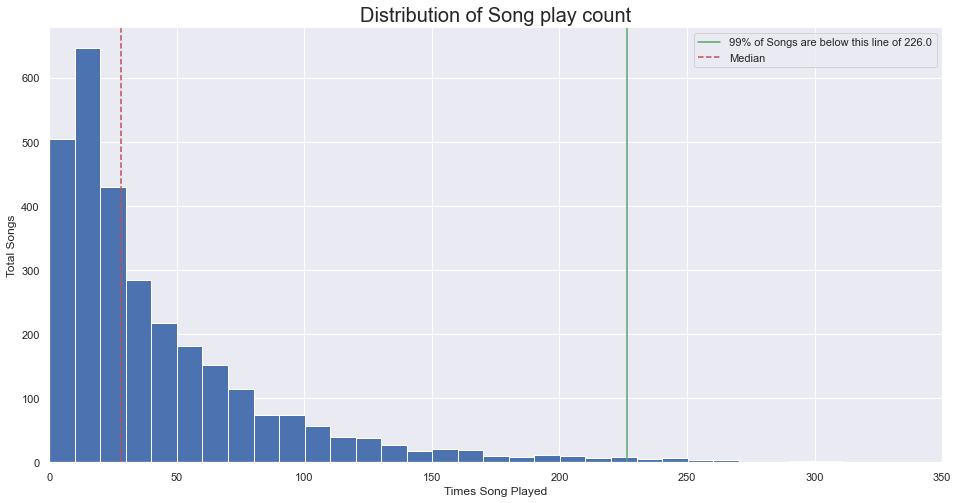

In [23]:
## Let's graph this. 
percentile_99 = np.percentile(music.plays,99)
median = np.median(music.plays)

_ = plt.figure(figsize=(16,8))
_ = music.plays.hist(bins=100)
_ = plt.xlim([0,350])
_ = plt.axvline(percentile_99, c ='g', label = '99% of Songs are below this line of ' +str(round(percentile_99,0)))
_ = plt.axvline(median, c='r', label = 'Median', linestyle ='--')
_ = plt.xlabel('Times Song Played', fontsize =12)
_ = plt.ylabel('Total Songs', fontsize =12)
_ = plt.title('Distribution of Song play count', fontsize =20)
_ = plt.legend()

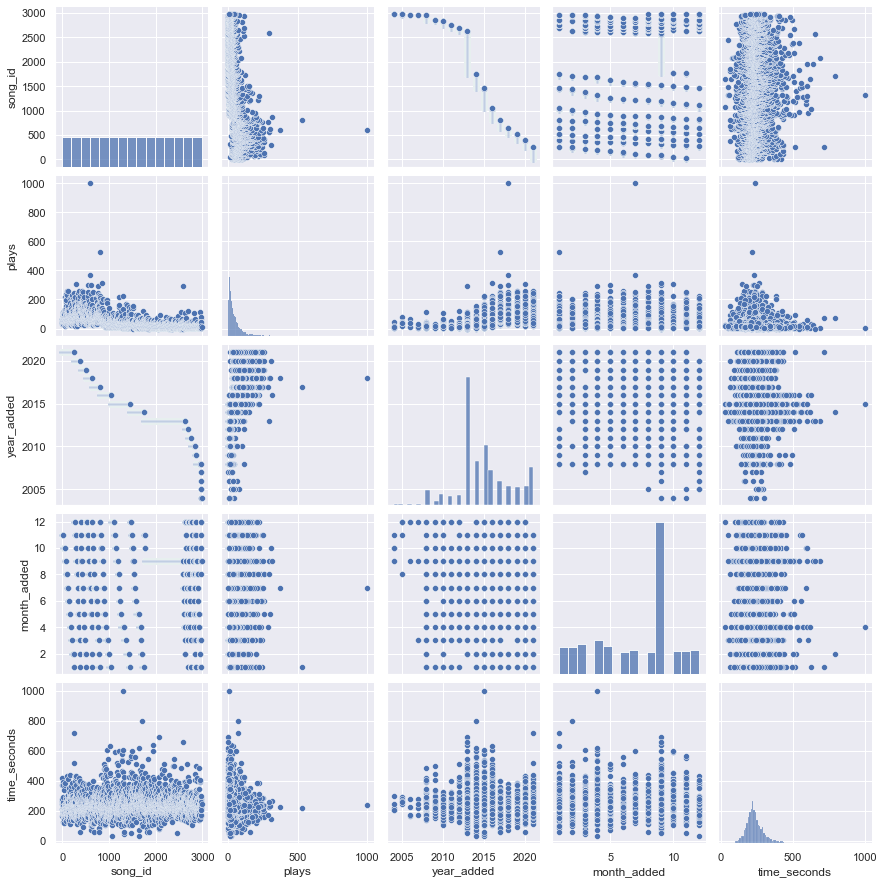

In [24]:
## Let's create a pairplot
sns.pairplot(music)
plt.show()

In [ ]:
## We can create a heatmap
plt.figure(figsize =(40,20))
sns.heatmap(music.corr(), annot =True)
plt.show()

# III. Modeling

## Modelling with Linear Regression

### 1. Simple Linear Regression:

In [25]:
## Let's preview our music data again
music.head(2)

,song_id,title,time,country,artist,album,plays,date_added,last_played,genre,year_added,month_added,time_seconds
0,1,The Set-Up,0 days 00:04:14,USA,Moodyman,NaN,30.0,2021-11-22 07:56:00,"11/23/21, 10:29 AM",EDM,2021,11,254.0
1,2,Italo Disco,0 days 00:06:56,FR,Lifelike,NaN,53.0,2021-11-22 07:54:00,"11/23/21, 7:59 PM",EDM,2021,11,416.0


In [26]:
## Let's see the columns
music.columns

Index(['song_id', 'title', 'time', 'country', 'artist', 'album', 'plays',
       'date_added', 'last_played', 'genre', 'year_added', 'month_added',
       'time_seconds'],
      dtype='object')

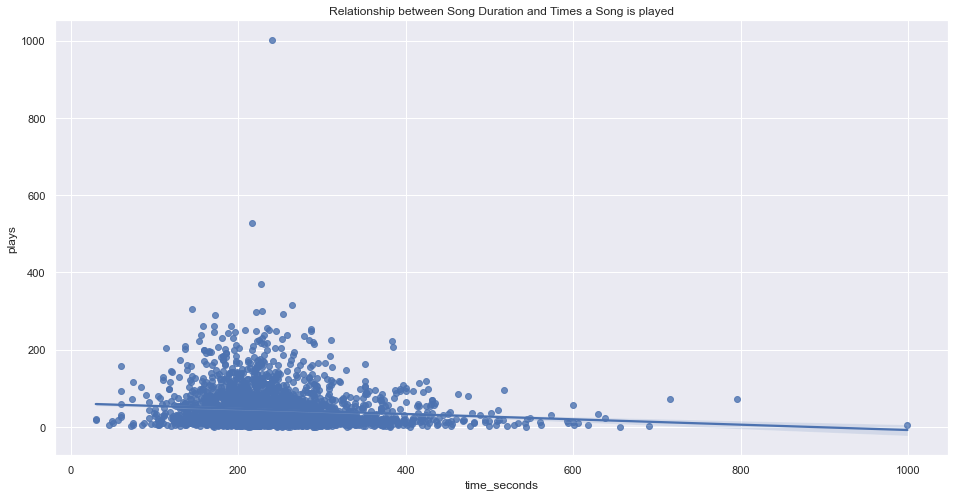

In [28]:
# Let's create a scatterplot to plot how much a song is played depending on its length
_ = plt.figure(figsize=(16,8))
_ = sns.regplot(x='time_seconds',y='plays', data=music)
_ = plt.title('Relationship between Song Duration and Times a Song is played')

In [30]:
## We see a slight negative correlation. Let's proceed to the Linear Regression by define our variables. 
X = music[['time_seconds']]
y = music[['plays']]

In [33]:
## We split our data in training and testing. 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 42)

In [34]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2234, 1) (2234, 1)
(745, 1) (745, 1)


In [35]:
## We fit our model and get R squared of 0.01: 
rModel = linear_model.LinearRegression(normalize = True)
rModel.fit(X_train, y_train)
print(rModel.score(X_train,y_train))

0.011753292381341263


Only 1 % of the variance in our data is explained by time_seconds. This is not a great result...

In [36]:
## We can also gety the pearson correlation coefficient and see that plays and time are negatively correlated. 
music.corr(method ='pearson')

,song_id,plays,year_added,month_added,time_seconds
song_id,1.000000,-0.548009,-0.948679,0.160851,0.061895
plays,-0.548009,1.000000,0.536870,-0.077648,-0.104106
year_added,-0.948679,0.536870,1.000000,-0.164466,-0.070401
month_added,0.160851,-0.077648,-0.164466,1.000000,-0.041478
time_seconds,0.061895,-0.104106,-0.070401,-0.041478,1.000000


The conclusion is that time_seconds is not as a good a predictor. 

## 2. Multiple Regression

Let's do a multiple linear regression with a couple of variables. 
- **Country of Origin**
- **Song Genre**
- **Year Added**
- **Month Added**
- **Time Seconds**

In [37]:
## We pick our variables and store them in a list features which will become our independent variables X. 
## We will only looking at songs below 200 plays.
features = ['country', 'genre', 'year_added', 'month_added','time_seconds']
music2 = music[music.plays <200]
X = music2[features]
X = sm.add_constant(X)
y = music2[["plays"]]

In [38]:
## We have to use one hot encoding with pd.get_dummies to pass our variables in the proper format.
X = pd.get_dummies(X, columns = ['country', 'genre', 'year_added', 'month_added','time_seconds'])
X.head()

,const,country_AUS,country_AUT,country_BB,country_BE,country_BRA,country_BY,country_CA,country_CH,country_CL,country_CN,country_COL,country_DE,country_DK,country_DZ,country_EE,country_EGY,country_ESP,country_FIN,country_FR,country_IE,country_IL,country_ITA,country_JM,country_JP,country_LT,country_MEX,country_MOL,country_NL,country_NOR,country_PAN,country_PT,country_RO,country_RUS,country_SK,country_SLO,country_SR,country_SWE,country_TUR,country_UK,country_USA,country_VEN,country_XK,country_ZA,genre_Alternative,genre_Comedy,genre_EDM,genre_Foreign,genre_Hip-Hop,genre_Mashup,genre_Other,genre_Pop,genre_Rock,genre_Soundtrack,year_added_2004,year_added_2005,year_added_2006,year_added_2007,year_added_2008,year_added_2009,year_added_2010,year_added_2011,year_added_2012,year_added_2013,year_added_2014,year_added_2015,year_added_2016,year_added_2017,year_added_2018,year_added_2019,year_added_2020,year_added_2021,month_added_1,month_added_2,month_added_3,month_added_4,month_added_5,month_added_6,month_added_7,month_added_8,month_added_9,month_added_10,month_added_11,month_added_12,time_seconds_30.000000000000004,time_seconds_46.0,time_seconds_49.0,time_seconds_51.0,time_seconds_56.0,time_seconds_60.00000000000001,time_seconds_72.0,time_seconds_73.0,time_seconds_74.0,time_seconds_75.0,time_seconds_84.0,time_seconds_85.0,time_seconds_88.0,time_seconds_90.0,time_seconds_94.0,time_seconds_96.0,time_seconds_99.0,time_seconds_101.0,time_seconds_102.0,time_seconds_104.0,time_seconds_105.0,time_seconds_107.0,time_seconds_108.0,time_seconds_109.0,time_seconds_110.0,time_seconds_111.0,time_seconds_112.0,time_seconds_113.0,time_seconds_114.0,time_seconds_115.00000000000001,time_seconds_117.00000000000001,time_seconds_118.00000000000001,time_seconds_119.00000000000001,time_seconds_120.00000000000001,time_seconds_121.00000000000001,time_seconds_122.00000000000001,time_seconds_123.00000000000001,time_seconds_124.00000000000001,time_seconds_125.00000000000001,time_seconds_126.00000000000001,time_seconds_127.00000000000001,time_seconds_128.0,time_seconds_129.0,time_seconds_130.0,time_seconds_131.0,time_seconds_132.0,time_seconds_134.0,time_seconds_135.0,time_seconds_136.0,time_seconds_137.0,time_seconds_138.0,time_seconds_139.0,time_seconds_140.0,time_seconds_141.0,time_seconds_142.0,time_seconds_143.0,time_seconds_144.0,time_seconds_145.0,time_seconds_146.0,time_seconds_147.0,time_seconds_148.0,time_seconds_149.0,time_seconds_150.0,time_seconds_151.0,time_seconds_152.0,time_seconds_153.0,time_seconds_154.0,time_seconds_155.0,time_seconds_156.0,time_seconds_157.0,time_seconds_158.0,time_seconds_159.0,time_seconds_160.0,time_seconds_161.0,time_seconds_162.0,time_seconds_163.0,time_seconds_164.0,time_seconds_165.0,time_seconds_166.0,time_seconds_167.0,time_seconds_168.0,time_seconds_169.0,time_seconds_170.0,time_seconds_171.0,time_seconds_172.0,time_seconds_173.0,time_seconds_174.0,time_seconds_175.0,time_seconds_176.0,time_seconds_177.0,time_seconds_178.0,time_seconds_179.0,time_seconds_180.0,time_seconds_181.0,time_seconds_182.0,time_seconds_183.0,time_seconds_184.0,time_seconds_185.0,time_seconds_186.0,time_seconds_187.0,time_seconds_188.0,time_seconds_189.0,time_seconds_190.0,time_seconds_191.0,time_seconds_192.0,time_seconds_193.0,time_seconds_194.0,time_seconds_195.0,time_seconds_196.0,time_seconds_197.0,time_seconds_198.0,time_seconds_199.0,time_seconds_200.0,time_seconds_201.0,time_seconds_202.0,time_seconds_203.0,time_seconds_204.0,time_seconds_205.0,time_seconds_206.0,time_seconds_207.0,time_seconds_208.0,time_seconds_209.0,time_seconds_210.0,time_seconds_211.0,time_seconds_212.0,time_seconds_213.0,time_seconds_214.0,time_seconds_215.0,time_seconds_216.0,time_seconds_217.0,time_seconds_218.0,time_seconds_219.0,time_seconds_220.0,time_seconds_221.0,time_seconds_222.0,time_seconds_223.0,time_seconds_224.0,time_seconds_225.0,time_seconds_226.0,time_seconds_227.0,time_seconds_228.0,time_seconds_229.00000000000003,time_seconds_230.00000000000003,ti

In [40]:
## We create training and testing data
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size =0.25, random_state =246)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2193, 469) (2193, 1)
(732, 469) (732, 1)


In [41]:
## We create and fit the model then look at the summary. 
rModel = linear_model.LinearRegression(normalize = True)
rModel = sm.OLS(y_train, X_train)
result = rModel.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  plays   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     6.149
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          3.19e-165
Time:                        08:41:09   Log-Likelihood:                -10055.
No. Observations:                2193   AIC:                         2.097e+04
Df Residuals:                    1763   BIC:                         2.342e+04
Df Model:                         429                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              24.3738      2.790      8.738      0.000      18.903      29.845
country_AUS                         4.8488      5.933      0.817      0.414      -6.787      16.485
country_AUT                        -1.0944      9.631     -0.114      0.910     -19.983      17.795
country_BB                         -0.2020     15.851     -0.013      0.990     -31.290      30.886
country_BE                         12.7427      9.590      1.329      0.184      -6.066      31.551
country_BRA                       -10.9982     10.873     -1.012      0.312     -32.324      10.327
country_BY                         -9.4000     26.933     -0.349      0.727     -62.224      43.424
country_CA                          4.3269      4.298      1.007      0.314      -4.102      12.756
country_CH                         38.3307     15.860      2.417      0.016       7.224      69.437
country_CL                        -30.6106     27.008     -1.133      0.257     -83.581      22.360
country_CN                        -29.0517     21.252     -1.367      0.172     -70.733      12.629
country_COL                         9.9725      8.866      1.125      0.261      -7.416      27.361
country_DE                          5.1179      4.551      1.124      0.261      -3.809      14.044
country_DK                        -10.4333     15.911     -0.656      0.512     -41.641      20.774
country_DZ                        122.4499     26.936      4.546      0.000      69.621     175.279
country_EE                        -17.3969     28.102     -0.619      0.536     -72.514      37.720
country_EGY                       -28.4293     27.472     -1.035      0.301     -82.310      25.451
country_ESP                        -7.0629      9.333     -0.757      0.449     -25.367      11.241
country_FIN                         3.2821     20.816      0.158      0.875     -37.545      44.110
country_FR                          7.3424      3.094      2.373      0.018       1.274      13.411
country_IE                          6.5112      9.584      0.679      0.497     -12.286      25.308
country_IL                         -4.6547     11.960     -0.389      0.697     -28.113      18.803
country_ITA                        -7.0922      6.915     -1.026      0.305     -20.655       6.471
country_JM                         -2.5345     11.623     -0.218      0.827     -25.331      20.262
country_JP                        -14.3831     26.774     -0.537      0.591     -66.895      38.129
country_LT                          4.4558     36.964      0.121      0.904     -68.043      76.954
country_MEX                        -1.9375     19.737     -0.098      0.922     -40.648      36.773
country_MOL                        13.8404     26.972      0.513      0.608     -39

Surprisingly accurate! Let's take a look at how well of a job it does. 

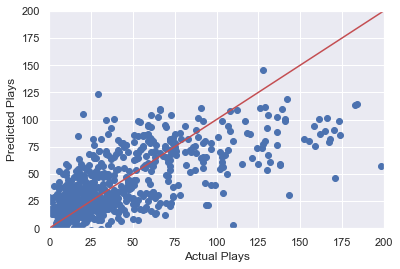

In [43]:
## We plot the results of our predictions vs the actual plays.
y_pred = result.predict(X_test)
plt.scatter(y_test, y_pred)

# Add a line for perfect correlation
plt.plot([x for x in range(0,200)],[x for x in range(0,200)], color='r')

# Label it nicely
plt.xlabel('Actual Plays')
plt.ylabel('Predicted Plays')
_ = plt.xlim([0,200])
_ = plt.ylim([0,200])
plt.show()

In [44]:
## We get our Root Mean Square Deviation and Mean Squared Error. 
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets)**2).mean())

def mse(predictions, targets):
    return abs((predictions - targets)).mean()


matches = pd.DataFrame(y_test)
matches.rename(columns = {'plays':'actual'}, inplace=True)
matches["predicted"] = y_pred

print('RMSE: ' + str(rmse(matches["actual"], matches["predicted"])))
print('MSE: ' + str(mse(matches["actual"], matches["predicted"])))

RMSE: 27.498052891084697
MSE: 19.892084073454473


For things that appear somewhat random, this regression model appears to be more reasonable than what is expected. There are a couple of details that were not mentionned which can explain this: 
- **Year_Played**: The year a song was added mattered because 
- **Seconds_Duration**: Since Ben can listen to songs a repeat a lot...
- **Genre**: As seen from dividing the graph, Ben has a couple of favorite Genres. 
- **Country**: An interesting finding is that some countries. There is colinearity which explains this. 

## 2. Modelling with Decision Trees and Random Forests. 

In [ ]:
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeClassifier
from io import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

In [ ]:
music.head(2)

In [ ]:
X = music.drop(columns=['title','song_id','artist','album','date_added','last_played','time'])
X = pd.get_dummies(X)
y = music[['genre']]

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size =0.25, random_state =246)
clf_dt = DecisionTreeClassifier(random_state =246)
clf_dt =clf_dt.fit(X_train,y_train)
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt, filled =True, rounded =True, class_names =['No','Yes'])

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size =0.25, random_state =246)
entr_model = tree.DecisionTreeClassifier(criterion ='entropy', random_state=1234)

# Call fit() on entr_model
entr_model.fit(X_train, y_train) 

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

# Check out entr_model
entr_model

In [ ]:
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names= X_train.columns,class_names = ["No", "Yes"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())